# Digit Detection: LeNet

Students: Juan Sebastián Barreto Jimenez y Juan Camilo Devia Bastos

Consultant: Ing. Eduardo Andrés Gerlien Reyes

Client: Ing. Olga Lucía Quintero Montoya

## Avoid warnings

In [2]:
# Avoid warnings in terminal
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Libraries

In [3]:
from tensorflow import keras
import keras.layers as layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import visualkeras

from keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import cv2

## Download and Process Data from MNIST Keras

In [4]:
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))
# scale data to the range of [0, 1]

print(trainData.shape)

trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0
# transform the training and testing labels into vectors in the
# range [0, classes] -- this generates a vector for each label,
# where the index of the label is set to `1` and all other entries
# to `0`; in the case of MNIST, there are 10 class labels
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)

(60000, 28, 28, 1)


## Export data to Excel

In [5]:
print(trainData[0].shape)

(28, 28, 1)


In [6]:
import pandas as pd

array =  testData.reshape((testData.shape[0], 28, 28))

#df = pd.DataFrame(array)
#df.to_excel(excel_writer = "output/test.xlsx",float_format='%.19f')

## Mount CNN: LeNet

In [7]:
model = keras.Sequential()
numChannels, imgRows, imgCols = 1, 28, 28
numClasses = 10
inputShape = (imgRows, imgCols, numChannels)
activation = 'relu' 

# if we are using "channels first", update the input shape
if K.image_data_format() == "channels_first":
	print("ENtre")
	inputShape = (numChannels, imgRows, imgCols)

print(inputShape)
model.add(layers.Conv2D(filters=20, kernel_size=(4,5), padding="same", activation=activation, input_shape=inputShape))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(filters=50, kernel_size=(4,5), padding="same", activation=activation))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(layers.Dense(units=500, activation=activation))
model.add(layers.Dense(units=numClasses, activation = 'softmax'))

(28, 28, 1)


2022-05-02 20:30:46.644228: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Compile CNN: LeNet

In [8]:
opt = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

## Train model

In [9]:
print("[INFO] training...")
model.fit(trainData, trainLabels, batch_size=128, epochs=20,verbose=1)

[INFO] training...
Epoch 1/20
469/469 [==============================] - 27s 57ms/step - loss: 1.0081 - accuracy: 0.7562
Epoch 2/20
469/469 [==============================] - 27s 57ms/step - loss: 0.2708 - accuracy: 0.9188
Epoch 3/20
469/469 [==============================] - 27s 58ms/step - loss: 0.1916 - accuracy: 0.9429
Epoch 4/20
469/469 [==============================] - 24s 50ms/step - loss: 0.1499 - accuracy: 0.9558
Epoch 5/20
469/469 [==============================] - 21s 45ms/step - loss: 0.1250 - accuracy: 0.9632
Epoch 6/20
469/469 [==============================] - 21s 45ms/step - loss: 0.1070 - accuracy: 0.9678
Epoch 7/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0944 - accuracy: 0.9716
Epoch 8/20
469/469 [==============================] - 28s 59ms/step - loss: 0.0849 - accuracy: 0.9746
Epoch 9/20
469/469 [==============================] - 28s 60ms/step - loss: 0.0783 - accuracy: 0.9762
Epoch 10/20
469/469 [==============================] - 29s 61ms

## Evaluate model

In [10]:
print("[INFO] evaluating...")
(loss, accuracy) = model.evaluate(testData, testLabels,batch_size=128, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

[INFO] evaluating...
79/79 [==============================] - 1s 13ms/step - loss: 0.0422 - accuracy: 0.9863
[INFO] accuracy: 98.63%


## Save Weights

In [11]:
print("[INFO] dumping weights to file...")
model.save_weights('output/lenet_weights.hdf5', overwrite=True)

[INFO] dumping weights to file...


In [38]:
json_config = model.to_json()
with open('output/model_config.json', 'w') as json_file:
    json_file.write(json_config)

## Randomly select a few testing digits

In [22]:
for i in np.random.choice(np.arange(0, len(testLabels)), size=(10,)):
	# classify the digit
	print(np.newaxis)
	probs = model.predict(testData[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	# extract the image from the testData if using "channels_first"
	# ordering
	if K.image_data_format() == "channels_first":
		image = (testData[i][0] * 255).astype("uint8")
	# otherwise we are using "channels_last" ordering
	else:
		image = (testData[i] * 255).astype("uint8")
	# merge the channels into one image
	image = cv2.merge([image] * 3)
	# resize the image from a
	#  28 x 28 image to a 96 x 96 image so we
	# can better see it
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
	# show the image and prediction
	cv2.putText(image, str(prediction[0]), (5, 20),
				cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
	print("[INFO] Predicted: {}, Actual: {}".format(prediction[0],
		np.argmax(testLabels[i])))
	cv2.imshow("Digit", image)
	cv2.waitKey(0)

None
[INFO] Predicted: 8, Actual: 8
None
[INFO] Predicted: 9, Actual: 9
None
[INFO] Predicted: 6, Actual: 6
None
[INFO] Predicted: 0, Actual: 0
None
[INFO] Predicted: 4, Actual: 4
None
[INFO] Predicted: 2, Actual: 2
None
[INFO] Predicted: 5, Actual: 9
None
[INFO] Predicted: 2, Actual: 2
None
[INFO] Predicted: 5, Actual: 5
None
[INFO] Predicted: 8, Actual: 8


In [30]:
i = 3
# classify the digit
probs = model.predict(testData[np.newaxis,i])
prediction = probs.argmax(axis=1)
# extract the image from the testData if using "channels_first"
# ordering
if K.image_data_format() == "channels_first":
	image = (testData[i][0] * 255).astype("uint8")
# otherwise we are using "channels_last" ordering
else:
	image = (testData[i] * 255).astype("uint8")
# merge the channels into one image
image = cv2.merge([image] * 3)
# resize the image from a
#  28 x 28 image to a 96 x 96 image so we
# can better see it
image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
# show the image and prediction
cv2.putText(image, str(prediction[0]), (5, 20),
			cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
print("[INFO] Predicted: {}, Actual: {}".format(prediction[0],
	np.argmax(testLabels[i])))
cv2.imshow("Digit", image)
cv2.waitKey(0)

[INFO] Predicted: 0, Actual: 0


-1

In [67]:
print(model.layers[5])

In [12]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
print(first_layer_weights.shape)
print(first_layer_weights)

(4, 5, 1, 20)
[[[[ 8.00166056e-02  4.87029888e-02 -1.17677167e-01 -6.42990693e-02
    -8.01520795e-02  6.62688911e-03  3.67881581e-02 -5.65666743e-02
    -3.54911722e-02  2.85553541e-02 -2.42474284e-02 -1.19536845e-02
     1.18741140e-01  4.01679128e-02 -2.66835988e-02 -3.22292447e-02
     1.58380419e-02  1.29047900e-01  3.08474183e-01  1.02628082e-01]]

  [[ 1.32393971e-01  9.27089900e-02 -1.24245293e-01 -7.84001201e-02
    -5.89206722e-03  5.02830260e-02  8.87574106e-02  1.54779553e-01
    -2.56307032e-02  7.73521960e-02 -7.42551833e-02 -9.87277105e-02
     1.33515105e-01 -7.81259462e-02 -8.85358974e-02  6.50218353e-02
     1.04982324e-01  2.73650259e-01  3.35529953e-01  3.81502626e-03]]

  [[ 4.15957049e-02  3.03704917e-01  4.04233932e-02 -1.09633192e-01
    -8.84775370e-02  5.68093397e-02 -7.57441595e-02 -3.61213237e-02
     7.48342797e-02  3.12223405e-01  2.10297238e-02  3.02670132e-02
     1.33051515e-01 -1.15816005e-01 -1.08512177e-03 -7.11711645e-02
     1.15272053e-01  1.52235

In [47]:
#outputs = [K.function([model.input], [layer.output])([testData, 1]) for layer in model.layers]
#layer = model.layers[0]
#keras_function = K.function([model.input], [layer.output])
#print(keras_function([trainData, 1]))


## Visualize CNN: LeNet

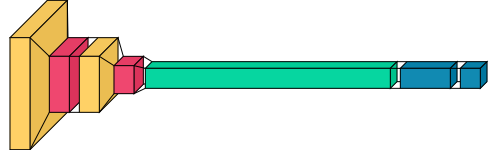

In [31]:
visualkeras.layered_view(model)